
# SYSTEM IDENTIFICATION CLEANING DATA




In [4]:
#LIBRARY
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

## IMPORT AND FILE

In [1]:
#IMPORT FILES

from google.colab import files
uploaded = files.upload()

Saving deltaTper2(17jan).csv to deltaTper2(17jan).csv


In [5]:
#READ CSV
deltaTper2 = pd.read_csv("deltaTper2(17jan).csv")
deltaTper2

,Graph 0,Graph 1,0.?0.00,0?0.00
0,0.0,0.01,0.0,0.0
1,0.0,0.01,NaN,NaN
2,0.0,0.01,NaN,NaN
3,0.0,0.01,NaN,NaN
4,0.0,0.01,NaN,NaN
...,...,...,...,...
1850,0.0,NaN,NaN,NaN
1851,0.0,NaN,NaN,NaN
1852,0.0,NaN,NaN,NaN
1853,0.0,NaN,NaN,NaN


In [9]:
#DELETE COLUMN
deltaTper2 = deltaTper2.drop("0?0.00", axis=1)


In [10]:
#CHECK DATA
deltaTper2

,Graph 0,Graph 1
0,0.0,0.01
1,0.0,0.01
2,0.0,0.01
3,0.0,0.01
4,0.0,0.01
...,...,...
1850,0.0,NaN
1851,0.0,NaN
1852,0.0,NaN
1853,0.0,NaN


In [14]:
#count for how much NaN ina column
nan_count = deltaTper2['Graph 1'].isna().sum() #to see sum
deltaTper2 = deltaTper2.dropna(subset=['Graph 1']) #to drop the NaN

In [19]:
#Rename Column
deltaTper2 = deltaTper2.rename(columns={'Graph 0': 'Actual'})

In [20]:
#Rename Column
deltaTper2 = deltaTper2.rename(columns={'Graph 1': 'Time'})

Change Value from RPM to rad/s

In [26]:

import math

multiplier = (math.pi *2 ) /60
deltaTper2["Actual"] = deltaTper2["Actual"] * multiplier
deltaTper2

,Actual,Time
0,0.0,0.01
1,0.0,0.01
2,0.0,0.01
3,0.0,0.01
4,0.0,0.01
...,...,...
1841,0.0,0.01
1842,0.0,0.01
1843,0.0,0.01
1844,0.0,0.01


Searching for a Median

In [27]:
#Count a median
actual = deltaTper2['Actual'].median()
actual

3.8725365443250177

Plotting

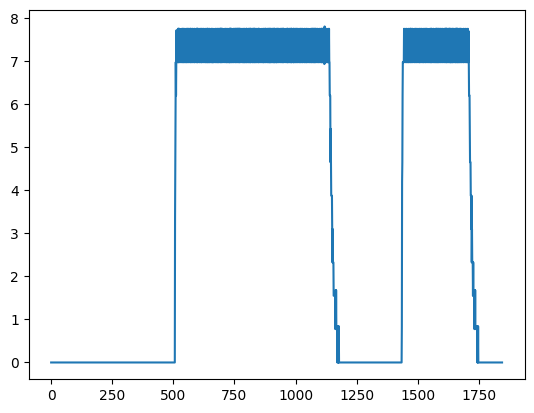

In [31]:
#For Ploting
plotting = plt.plot(deltaTper2);
plotting

In [38]:
#If there is more than 1 graph
df2 = deltaTper2.loc[1250:]

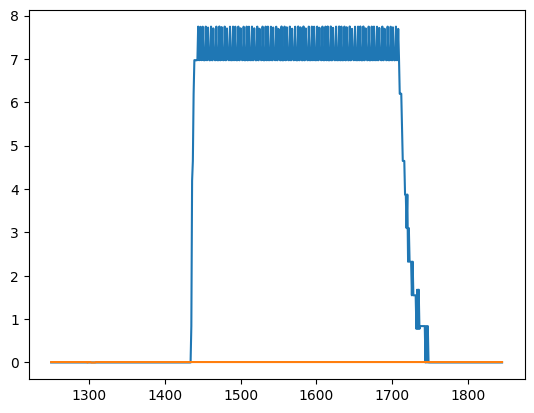

In [42]:
#See the plot
plt.plot(df2)

## Making a target column

In [44]:
#search for standart target
target = df2['Actual'].mode()
#if it's different with the value, use .median()
#or use this target = df2[(df2['Actual'] > 6)].mean()
target

0    0.0
Name: Actual, dtype: float64

In [ ]:
#make a target column
df2['Target'] = target

In [58]:
#search for the value that is not zero, use the index
df2[(df2['Actual'] > 6) & (df2['Actual'] < 8)]

,Actual,Time,Target
1438,6.196268,0.01,7.17
1439,6.971194,0.01,7.17
1440,6.973288,0.01,7.17
1441,6.969100,0.01,7.17
1442,6.969100,0.01,7.17
...,...,...,...
1708,7.692713,0.01,7.17
1709,7.018318,0.01,7.17
1710,6.194174,0.01,7.17
1711,6.196268,0.01,7.17


In [60]:
#using the index that is should be zero, make it zero
df2['Target'].loc[:1438] = 0

<ipython-input-60-b05475bcaa6e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Target'].loc[:1438] = 0


In [61]:
#make the target is zero value
df2['Target'].loc[1712:] = 0

<ipython-input-61-adcecea45323>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Target'].loc[1712:] = 0


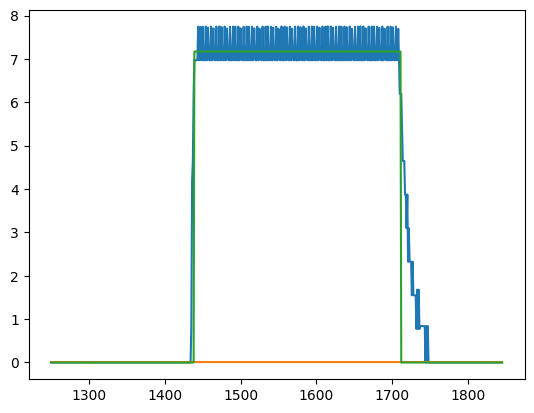

In [62]:
#See the plot
plt.plot(df2)

In [68]:
#Don't forget to reset index
df2.reset_index(drop=True, inplace=True)


## Download the dataframe

In [69]:
df2.to_csv('deltaTper2Clean.csv', index=False)